In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
train=pd.read_csv('new_train_model.csv', encoding = "latin")
test = pd.read_csv('update_test.csv', encoding = "latin")

In [2]:
train.head()

,Unnamed: 0,winner,toss,ground,strength,bat_strengthA,ball_strengthA,bat_strengthB,ball_strengthB
0,0,1,1,1,0.04413,4.37967,3.56982,4.50005,3.35681
1,1,0,0,0,-1.02666,3.56471,2.63174,5.20090,3.75406
2,2,0,1,0,-0.74886,3.93305,2.35386,3.82710,4.48455
3,3,0,1,1,-0.35147,3.95572,2.57773,4.56412,2.78743
4,4,0,0,1,-0.34763,3.67950,2.77626,4.75009,2.69888


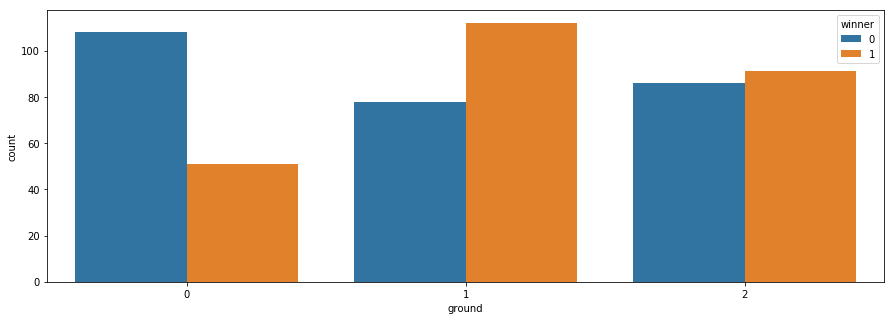

In [3]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x="ground", hue="winner")

In [6]:
column_train=['ground','toss','strength']
x=train[column_train]
y=train["winner"]

In [7]:
x['strength'].isnull().sum()
x['toss'].isnull().sum()
x['ground'].isnull().sum()

0

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split


In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [10]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
print(clf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [11]:
from sklearn import metrics
Y_pred=clf.predict(X_test)
print("accuracy",metrics.accuracy_score(Y_test,Y_pred))
print("accuracy",metrics.precision_score(Y_test,Y_pred))

accuracy 0.620253164557
accuracy 0.584415584416


In [12]:
print(clf.predict(X_test[0:10]))
prediction_svm=round(clf.score(X_test,Y_test)*100,2)
print(prediction_svm)

[0 0 0 1 1 0 1 1 0 0]
62.03


In [13]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
prediction_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [14]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test)  
prediction_decisiontree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
prediction_logistic = round(logreg.score(X_train, Y_train) * 100, 2)

In [16]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression', 'Naive Bayes', 'Decision Tree'],
    'Score': [prediction_svm, prediction_logistic, prediction_gaussian, prediction_decisiontree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Decision Tree
66.03,Logistic Regression
64.13,Naive Bayes
62.03,Support Vector Machines


In [17]:
column_test=['ground','toss','strength']
t=test[column_train]
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x, y)
pred = decision_tree.predict(t)

In [18]:
submission = pd.DataFrame({
        "id":test["id"],
        "winner": test["winner"],
        "actual": pred
    })

#submission.to_csv('submission.csv', index=False)

In [19]:
submission.head()

,actual,id,winner
0,1,526,1
1,0,527,0
2,1,528,1
3,1,529,0
4,0,530,0


In [49]:
len(submission["id"])

165

In [51]:
mat=0
for i in range(len(submission["id"])):
    if submission["actual"][i]==submission["winner"][i]:
        mat+=1

In [54]:
mat/len(submission["id"])

0.5636363636363636